In [3]:
import pandas as pd
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_confusion_matrix, plot_decision_regions


In [2]:
df = pd.read_csv("/data/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
y = df.Species
y.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [5]:
features = ["SepalLengthCm", "PetalLengthCm"]

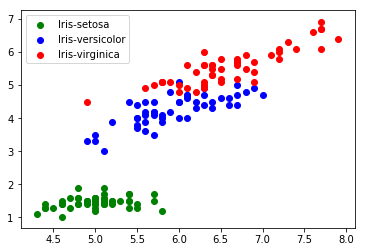

In [6]:
cmap = {"Iris-virginica": "red",
        "Iris-setosa": "green",
        "Iris-versicolor": "blue"}
colors = [cmap[c] for c in df.Species]

for i, v in enumerate(y.unique()):
    df2 = df[df.Species == v][features]
    plt.scatter(df2.iloc[:, 0], df2.iloc[:, 1], color = cmap[v], label = v)

plt.legend()

0.911111111111


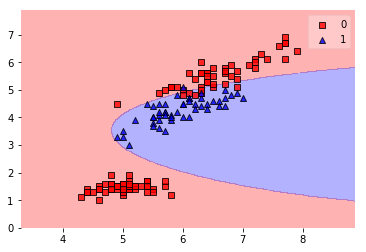

In [7]:
y = np.where(df.Species == "Iris-versicolor", 1, 0)
X = df[features].values

X_train, X_test, y_train, y_test = model_selection.train_test_split(X
                , y, test_size = 0.3, random_state = 123)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree = 3, 
                                include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression(C = 1, random_state = 1))
])

pipe.fit(X_train, y_train)
plot_decision_regions(X, y, pipe)
print(pipe.score(X_test, y_test))

0.911111111111


Text(0,0.5,'PetalLengthCm')

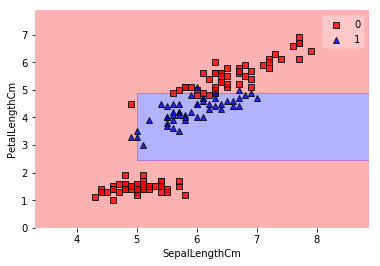

In [9]:
features = ["SepalLengthCm", "PetalLengthCm"]

y = np.where(df.Species == "Iris-versicolor", 1, 0)
X = df[features].values

X_train, X_test, y_train, y_test = model_selection.train_test_split(X
                , y, test_size = 0.3, random_state = 123)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree = 1, 
                                include_bias=False)),
    #("scaler", preprocessing.StandardScaler()),
    ("est", tree.DecisionTreeClassifier(max_depth = 3))
])

pipe.fit(X_train, y_train)
plot_decision_regions(X, y, pipe)
print(pipe.score(X_test, y_test))
plt.xlabel(features[0])
plt.ylabel(features[1])

In [29]:
pd.DataFrame({"feature": features, 
              "importance": est.feature_importances_})

,feature,importance
0,SepalLengthCm,0.020032
1,PetalLengthCm,0.979968


0.933333333333


Text(0,0.5,'PetalLengthCm')

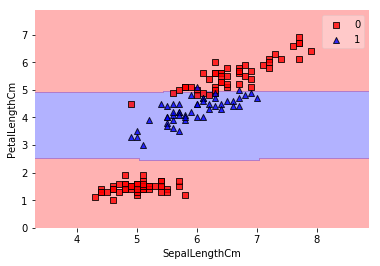

In [15]:
features = ["SepalLengthCm", "PetalLengthCm"]

y = np.where(df.Species == "Iris-versicolor", 1, 0)
X = df[features].values

X_train, X_test, y_train, y_test = model_selection.train_test_split(X
                , y, test_size = 0.3, random_state = 123)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree = 1, 
                                include_bias=False)),
    #("scaler", preprocessing.StandardScaler()),
    ("est", ensemble.RandomForestClassifier(max_depth = 3, 
                                max_features = 0.6))
])

pipe.fit(X_train, y_train)
plot_decision_regions(X, y, pipe)
print(pipe.score(X_test, y_test))
plt.xlabel(features[0])
plt.ylabel(features[1])

In [16]:
features = ["SepalLengthCm", "PetalLengthCm", 
            "SepalWidthCm", "PetalWidthCm"]
y = np.where(df.Species == "Iris-versicolor", 1, 0)
X = df[features].values

X_train, X_test, y_train, y_test = model_selection.train_test_split(X
                , y, test_size = 0.3, random_state = 123)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree = 1, 
                                include_bias=False)),
    #("scaler", preprocessing.StandardScaler()),
    ("est", ensemble.RandomForestClassifier(max_depth = 3, 
                                max_features = 0.6))
])

pipe.fit(X_train, y_train)
est = pipe.steps[-1][1]
print("Accuracy", pipe.score(X_test, y_test))
pd.DataFrame({"feature": features, 
              "importance": est.feature_importances_})


Accuracy 0.955555555556


,feature,importance
0,SepalLengthCm,0.135371
1,PetalLengthCm,0.292608
2,SepalWidthCm,0.059173
3,PetalWidthCm,0.512848
